In [1]:
from LimitSetting_Libraries import *

In [2]:
L = LimitSetter()

fs = lambda v : 100*(0.5*ss.norm.pdf(v,loc=3,scale=1)+0.6*ss.norm.pdf(v,loc=30,scale=1)+0.8*ss.norm.pdf(v,loc=3,scale=1)+0.2*ss.norm.pdf(v,loc=15,scale=0.3))
fb = lambda v : 3*(v==v)*np.exp(-0.02*v)
nptx = 200
emin = 0 
emax = 40
x = np.linspace(emin,emax,nptx)

Existing PoissonDataFile with 1000 precalculated values is used


ellapsed time = 3.67 s
optimized ROI between 2.21 and 4.22


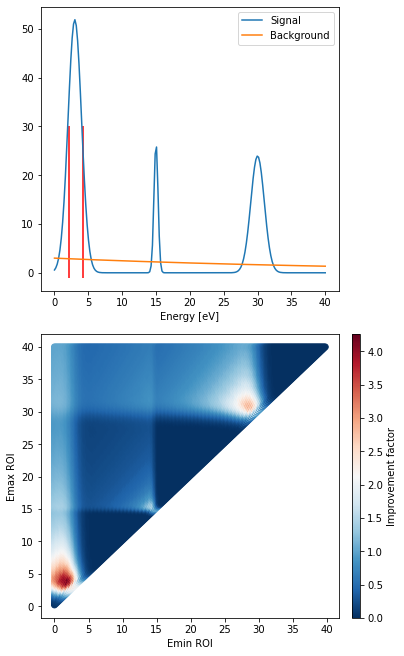

In [3]:
# ONLY 1 ROI : BRUT FORCE JULIEN VERSION
start = time.time()
minROI,maxROI = L.DetermineROI(fs,fb,emin,emax,nptx,Plot=True)
end = time.time()
print("ellapsed time = {:.2f} s".format(end-start))  
print("optimized ROI between {:.3} and {:.3}".format(minROI,maxROI))

ellapsed time = 0.20 s
optimized ROI between 2.21 and 4.22


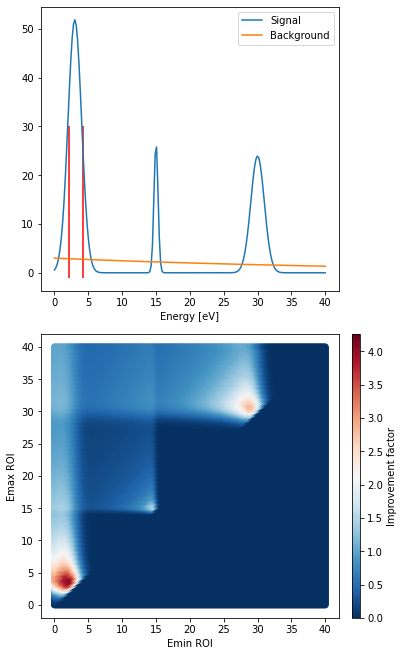

In [4]:
# ONLY 1 ROI : BRUT FORCE JULIEN VERSION OPTIMIZED WITH NUMPY FOR FAST CALCULATION
start = time.time()
minROI,maxROI = L.NEW_DetermineROI(fs,fb,emin,emax,nptx,Plot=True)
end = time.time()
print("ellapsed time = {:.2f} s".format(end-start))  
print("optimized ROI between {:.3} and {:.3}".format(minROI,maxROI))

final ROI list consists of 2 ROI(s)
[2.01,4.02] eV
[29.35,30.55] eV
ellapsed time = 0.0077 s


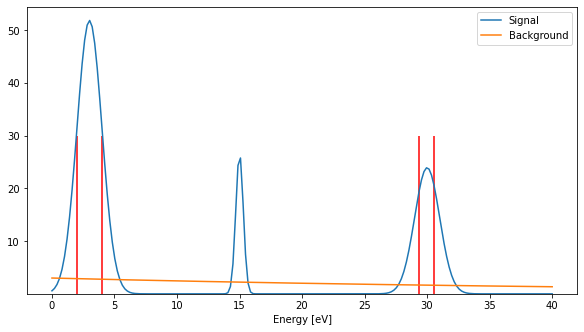

In [5]:
f, ax1 = plt.subplots(1,1, constrained_layout=True,figsize=(8,4.5))
ax1.plot(x,fs(x),color='C0',label='Signal')
ax1.plot(x,fb(x),color='C1',label='Background')
ax1.set_xlabel("Energy [eV]")
ax1.set_yscale("linear")
plt.legend()
ax1.set_ylim(bottom=0.01)
#ax1.set_xlim((0,40))

# MULTIPLE ROI : SUPER FAST + NUMPY OPTIMIZED
start = time.time()
listROI = L.Multi_DetermineROI(fs,fb,emin,emax,nptx,Plot=False)
end = time.time()
print("ellapsed time = {:.4f} s".format(end-start)) 

    #ax = plt.gca()
for toto,tata in listROI:
    ax1.vlines(toto, ymin=-1, ymax=30, color='r')
    ax1.vlines(tata, ymin=-1, ymax=30, color='r')
